In [45]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
import warnings
from constants import *
import math
import seaborn as sns
import random
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import dill
dill.load_session('../Weights/HMM_GaussianHMM_5points_log2_RNASeq.db')

In [47]:
list_k = range(2,len(X_i_K_ARRAYS)+2)
BIC_scores = []
for idx in range(len(X_i_K_ARRAYS)):
    model = HMM_K_ARRAYS[idx]
    X = X_i_K_ARRAYS[idx]
    BIC_scores.append(BIC_array(model,X))

In [52]:
for idx,i in enumerate(BIC_scores):
    print(idx+2,i)

2 -23447.7294414
3 -14630.2893351
4 -10470.9409796
5 -8000.85545944
6 -4867.80673982
7 -3342.80653573
8 -2938.66935395
9 -1582.04501369
10 -868.575957948
11 268.207211177
12 343.552060973
13 1392.72401318
14 1817.06955656
15 2233.56227975
16 2360.84245725
17 3276.30260361
18 3780.97478496
19 4426.4232761
20 4444.15076597


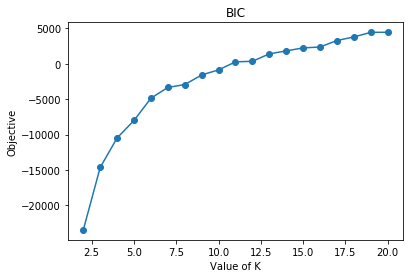

In [48]:
plot_BIC(list_k,BIC_scores)

In [53]:
def plot_cluster(X,count):
    fig = plt.subplot(111)
    axes = plt.gca()
    axes.set_ylim([0,11])
    var_plot_list = ['cdRPKM0','cdRPKM1','cdRPKM2','cdRPKM3','cdRPKM4']
    total=0
    for i in range(len(X)):
        fig.plot(var_plot_list, X[i])
        total+=1
    title = "HMM "+ str(count)+" : " + str(total) + " points "
    plt.title(title)
    plt.savefig('RPKMoutput/Clusters/5points/RNASeq/HMM'+str(count)+'.png')
    plt.show()

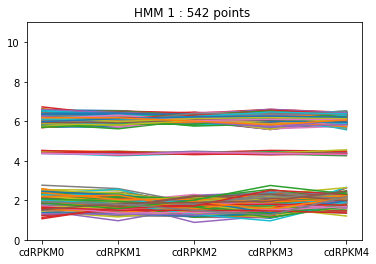

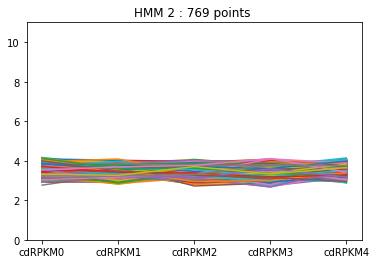

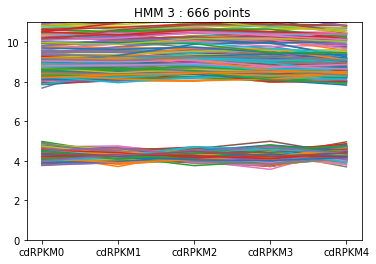

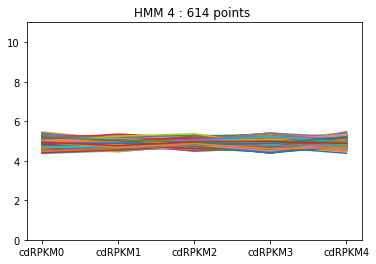

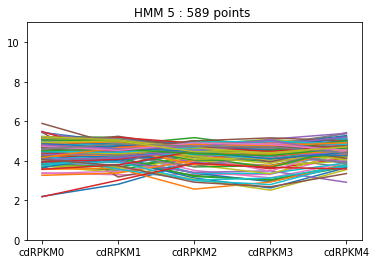

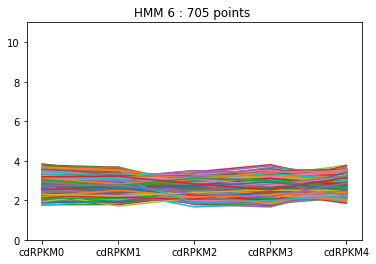

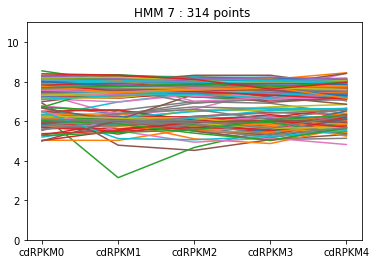

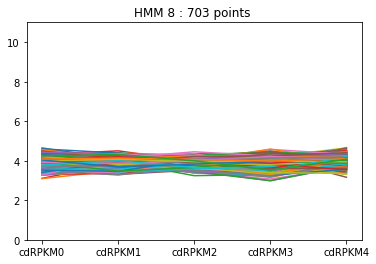

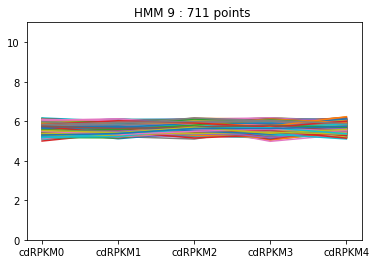

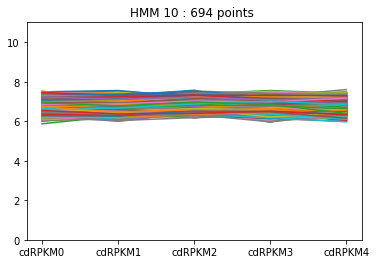

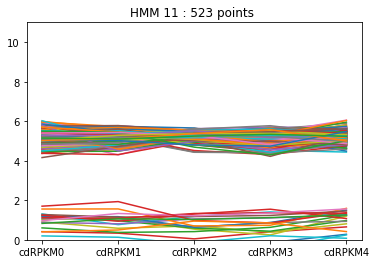

In [54]:
for idx,X in enumerate(X_i_K_ARRAYS[9]):
    plot_cluster(X,idx+1)

In [55]:
def plot_heatmap(X,idx):
    plt.figure()
    sns.heatmap(X,vmin=0, vmax=10)
    plt.title('Heatmap'+str(idx))
    plt.savefig('RPKMoutput/Clusters/5points/RNASeq/Heatmap'+str(idx+1)+'.png')
    plt.show()

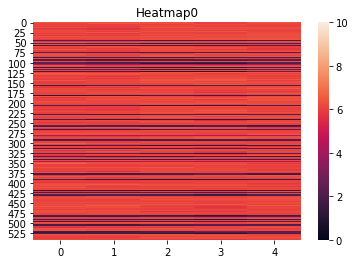

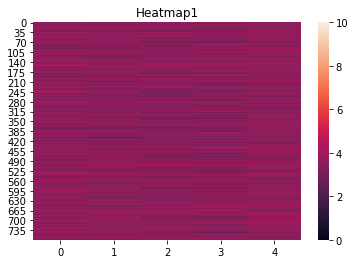

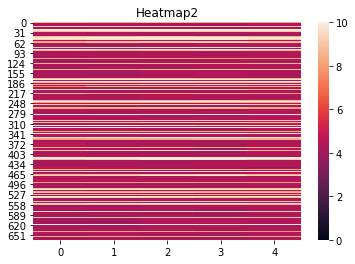

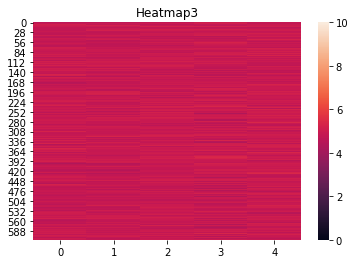

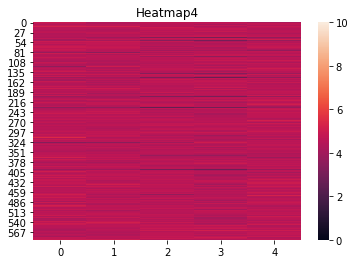

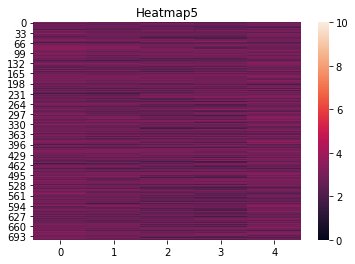

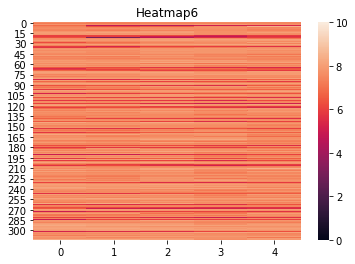

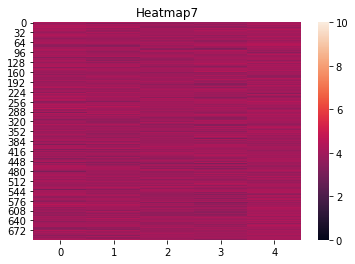

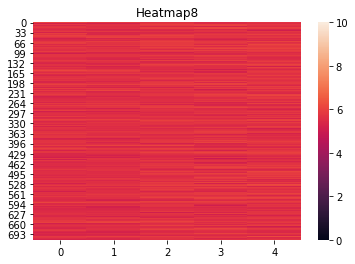

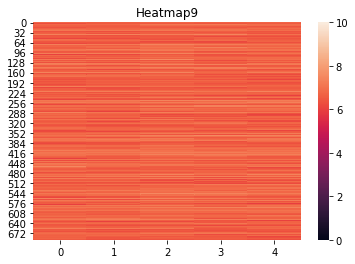

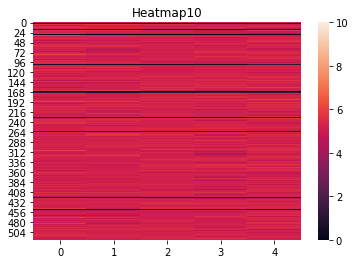

In [56]:
for idx,X in enumerate(X_i_K_ARRAYS[9]):
    plot_heatmap(X,idx)

In [57]:
X_model=X_i_K_ARRAYS[9]

In [58]:
df = pd.read_csv('RPKMOutput/RNASeq.txt', sep=" ", na_values=['-'])
df = df.dropna()
df = df[['AccNum','GeneName','cdRPKM0','cdRPKM1','cdRPKM2','cdRPKM3','cdRPKM4']]

In [59]:
df.head()

,AccNum,GeneName,cdRPKM0,cdRPKM1,cdRPKM2,cdRPKM3,cdRPKM4
0,NM_017847,ODR4,6.642349,5.591876,6.004645,5.369988,8.507454
1,NM_001143986,TLE6,0.421957,0.429708,0.201468,0.426413,0.397381
2,NM_001003803,ATP5S,8.115351,9.879314,9.263817,7.164127,7.730539
3,NM_001003800,BICD2,54.937502,55.371390,64.913315,67.172940,78.293873
4,NM_016649,ESF1,1.206070,1.252307,0.451649,0.860333,1.781686


In [60]:
df[['cdRPKM0','cdRPKM1','cdRPKM2','cdRPKM3','cdRPKM4']] = df[['cdRPKM0','cdRPKM1','cdRPKM2','cdRPKM3','cdRPKM4']].apply(lambda x: np.log2(x))


In [61]:
for idx,x in enumerate(X_model):
    genes=[]
    acc_nums=[]
    for row in x:
        temp = (df.loc[(df['cdRPKM0'] == row[0])& (df['cdRPKM1']== row[1]) & (df['cdRPKM2']== row[2])])
        if(not temp.empty):
            genes.append(temp['GeneName'].values[0])
            acc_nums.append(temp['AccNum'].values[0])
    with open('RPKMoutput/Clusters/5points/RNASeq/GO/Gene'+str(idx+1)+'.txt','w') as f:
        for gene in genes:
            f.write("%s\n" % gene)
    with open('RPKMoutput/Clusters/5points/RNASeq/GO/AccNum'+str(idx+1)+'.txt','w') as f:
        for acc_num in acc_nums:
            f.write("%s\n" % acc_num)